# LUME-EBLT devel

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from eblt.input import EBLTInput, assign_names_to_elements
from eblt.output import EBLTOutput
from eblt.plot import plot_lattice_lines

import numpy as np

from scipy.constants import c
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.units import mec2
import rich
import matplotlib.pyplot as plt

# Load input file

In [3]:
I = EBLTInput.from_file('example1/eblt.in')
assign_names_to_elements(I.lattice_lines)

# View input

In [4]:
rich.print(I)

EBLTInput(
    parameters=Parameters(
        np=1024,
        nz=128,
        zmin=-0.002981592,
        zmax=0.002211398,
        flagfwd=1,
        flagdist=200,
        Iavg=0.13,
        Ek=92706472.0,
        mass=511005.0,
        charge=-1.0,
        freq=1300000000.0
    ),
    phase_space_coefficients=PhaseSpaceCoefficients(coefficients=[1.0, 0.0, 0.0]),
    current_coefficients=Icoefficients(coefficients=[0.0, 0.0, 0.0]),
    lattice_lines=[
        ChangeEnergy(energy_increment=5462800.0, name='changeenergy1'),
        DriftTube(length=74.9744159418, beam_radius=0.0003, name='drifttube1'),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=1.0, name='wakefield1'),
        RFCavity(
            length=16.603888,
            beam_radius=0.0003,
            gradient=10907447.83,
            frequency=1300000000.0,
            phase_deg=-17.43982832,
            name='rfcavity1'
        ),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=-1.0, name='wakefield2'),
        DriftTube(length=8.5305163742, beam_radius=0.0003, name='drifttube2'),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=42.0, switch=1.0, name='wakefield3'),
        RFCavity(
            length=5.5346304,
            beam_radius=0.0003,
            gradient=9053035.459,
            frequency=3900000000.0,
            phase_deg=-148.9681881,
            name='rfcavity2'
        ),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=42.0, switch=-1.0, name='wakefield4'),
        DriftTube(length=12.518616788, beam_radius=0.0003, name='drifttube3'),
        DriftTube(length=7.256313209, beam_radius=0.0003, name='drifttube4'),
        Chicane(
            length=0.203558243263,
            beam_radius=0.0003,
            drift_length=2.44781923989,
            angle=2.01,
            R56=-0.079148634163993,
            T566=0.105531512218657,
            U5666=0.09962502193,
            CSR_switch=0.0,
            SC_switch=None,
            name='chicane1'
        ),
        WriteBeam(iwrite=210, sample=1024, name='writebeam1'),
        DriftTube(length=50.497160326, beam_radius=0.0002, name='drifttube5'),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=1.0, name='wakefield5'),
        RFCavity(
            length=99.623328,
            beam_radius=0.0002,
            gradient=14884059.27,
            frequency=1300000000.0,
            phase_deg=-20.75395814,
            name='rfcavity3'
        ),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=-1.0, name='wakefield6'),
        DriftTube(length=53.693543574, beam_radius=0.0002, name='drifttube6'),
        DriftTube(length=23.684874436, beam_radius=0.0002, name='drifttube7'),
        Chicane(
            length=0.549165215621,
            beam_radius=0.0002,
            drift_length=9.86910678674,
            angle=2.01,
            R56=-0.059542132248146,
            T566=0.0793895096641947,
            U5666=0.05588589286,
            CSR_switch=0.0,
            SC_switch=None,
            name='chicane2'
        ),
        DriftTube(length=34.162976438, beam_radius=0.0002, name='drifttube8'),
        WriteBeam(iwrite=212, sample=1024, name='writebeam2'),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=1.0, name='wakefield7'),
        RFCavity(
            length=166.038878,
            beam_radius=0.0002,
            gradient=15300378.91,
            frequency=1300000000.0,
            phase_deg=0.07099703584,
            name='rfcavity4'
        ),
        Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=-1.0, name='wakefield8'),
        DriftTube(length=100.187336314, beam_radius=0.0002, name='drifttube9'),
        DriftTube(length=193.468002, beam_radius=0.0002, name='drifttube10'),
        Wakefield(length=0.0, multiplier=24.0, wake_function_file_id=46.0, switch=1.0, name='wakefie

# Plot lattice

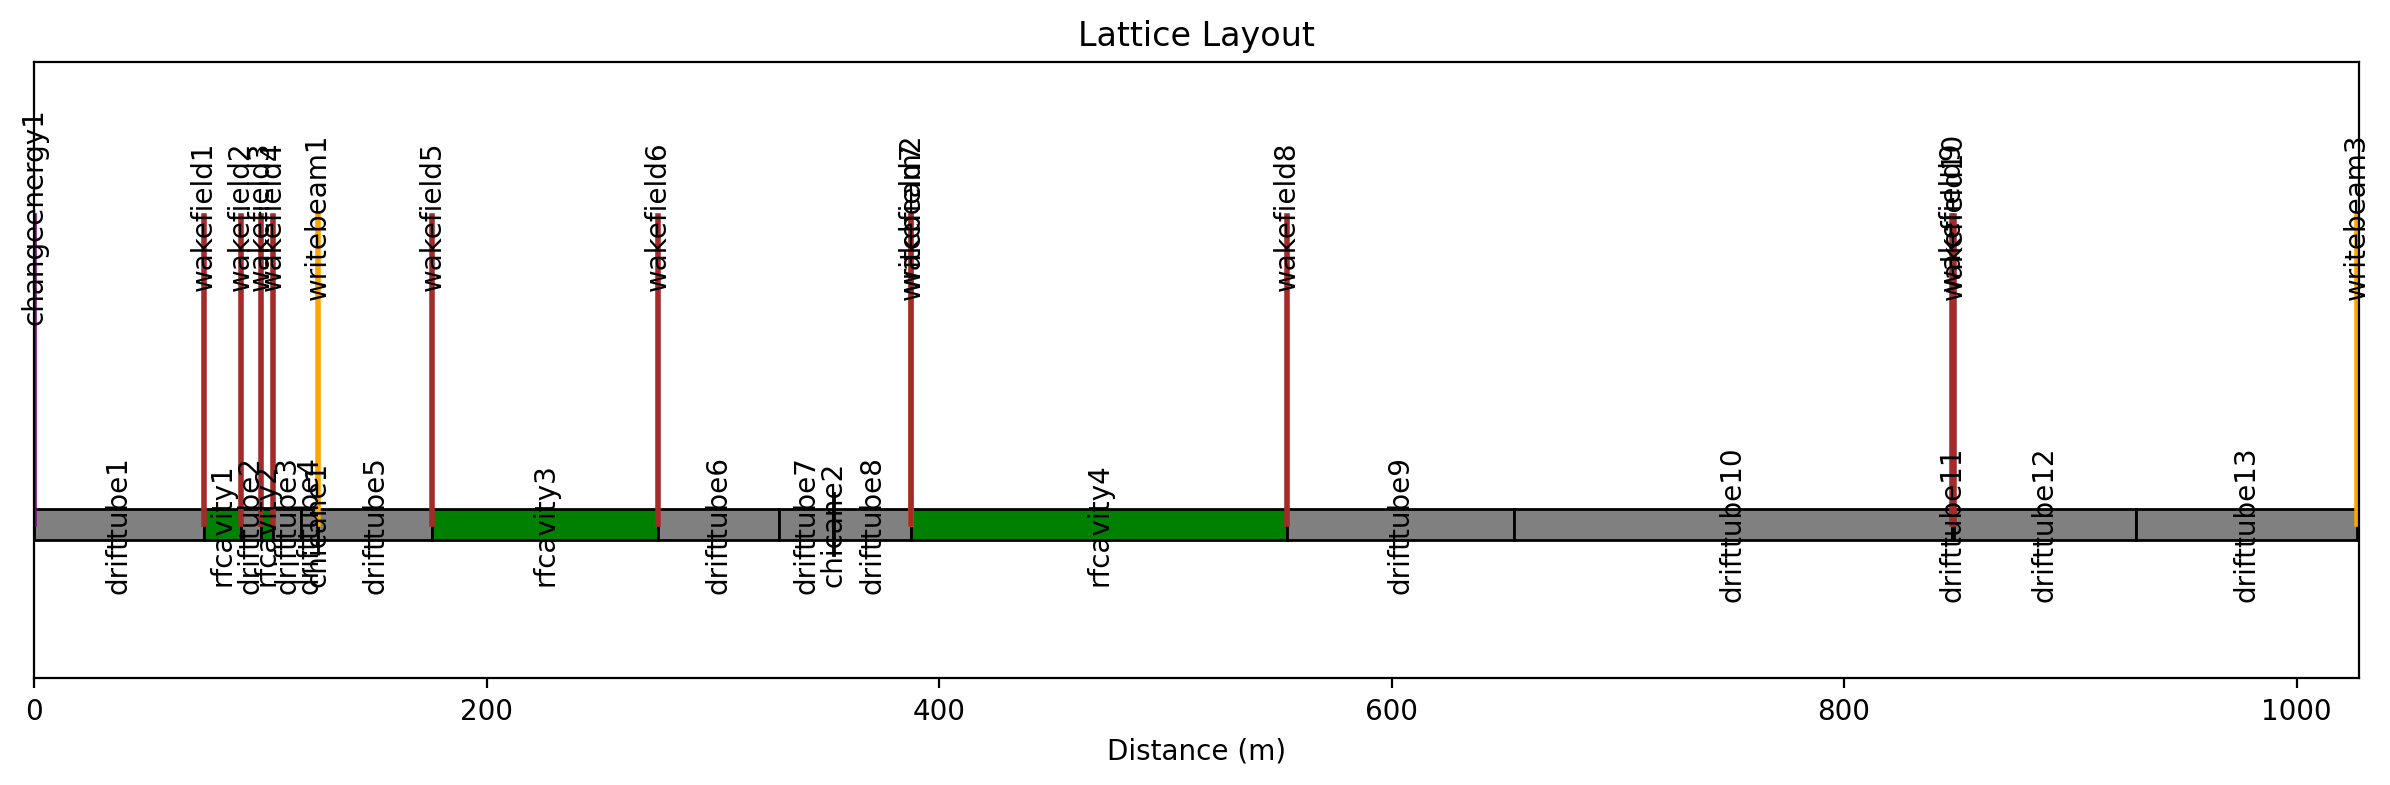

In [5]:
plot_lattice_lines(I.lattice_lines)

# Write input for testing

TODO: parsing rfdata, pts.in

In [6]:
I.to_file('test/eblt.in')

In [7]:
!mkdir test
!cd test;cp ../example1/rfdata* .;cp ../example1/pts.in .;

mkdir: test: File exists


# Run manually

In [8]:
!cd test;$EBLT_EXE >log.txt;head log.txt;tail log.txt

 EBLT - Electron Beam Longitudinal Tracking (forward or backward): Vs1.0beta
 Read input data from file - eblt.in:
 flagfwd:           1
 forward tracking...
 isamp:          200
 chglc:   9.9999843703497204E-011   0.0000000000000000        1.0000000000000000     
 total charge (C):   9.9999843703497204E-011
 pass setting up lattice...
 enter elment (type code):            1         -39
 zedge:    0.0000000000000000     
 enter elment (type code):           29           0
 zedge:    847.52720325988412     
 enter elment (type code):           30         -41
 zedge:    848.52720325988412     
 enter elment (type code):           31           0
 zedge:    848.52720325988412     
 enter elment (type code):           32           0
 zedge:    928.85680425988403     
 enter elment (type code):           33          -2
 zedge:    1026.6053828528841     


# Load output

In [9]:
O = EBLTOutput.from_directory('test')
O.stats.model_fields.keys()

dict_keys(['distance', 'kinetic_energy', 'gamma', 'mean_z', 'rms_z', 'mean_delta_gamma', 'rms_delta_gamma'])

In [10]:
O.stats.model_fields

{'distance': FieldInfo(annotation=ndarray, required=True, description='Distance along the beamline (m)', metadata=[<class 'eblt.output._PydanticNDArray'>]),
 'kinetic_energy': FieldInfo(annotation=ndarray, required=True, description='Kinetic energy (eV)', metadata=[<class 'eblt.output._PydanticNDArray'>]),
 'gamma': FieldInfo(annotation=ndarray, required=True, description='Relativistic gamma (1)', metadata=[<class 'eblt.output._PydanticNDArray'>]),
 'mean_z': FieldInfo(annotation=ndarray, required=True, description='Mean Z coordinate (m)', metadata=[<class 'eblt.output._PydanticNDArray'>]),
 'rms_z': FieldInfo(annotation=ndarray, required=True, description='RMS Z coordinate (m)', metadata=[<class 'eblt.output._PydanticNDArray'>]),
 'mean_delta_gamma': FieldInfo(annotation=ndarray, required=True, description='Mean Δγ', metadata=[<class 'eblt.output._PydanticNDArray'>]),
 'rms_delta_gamma': FieldInfo(annotation=ndarray, required=True, description='RMS Δγ', metadata=[<class 'eblt.output._

(0.0, 4358.1709564)

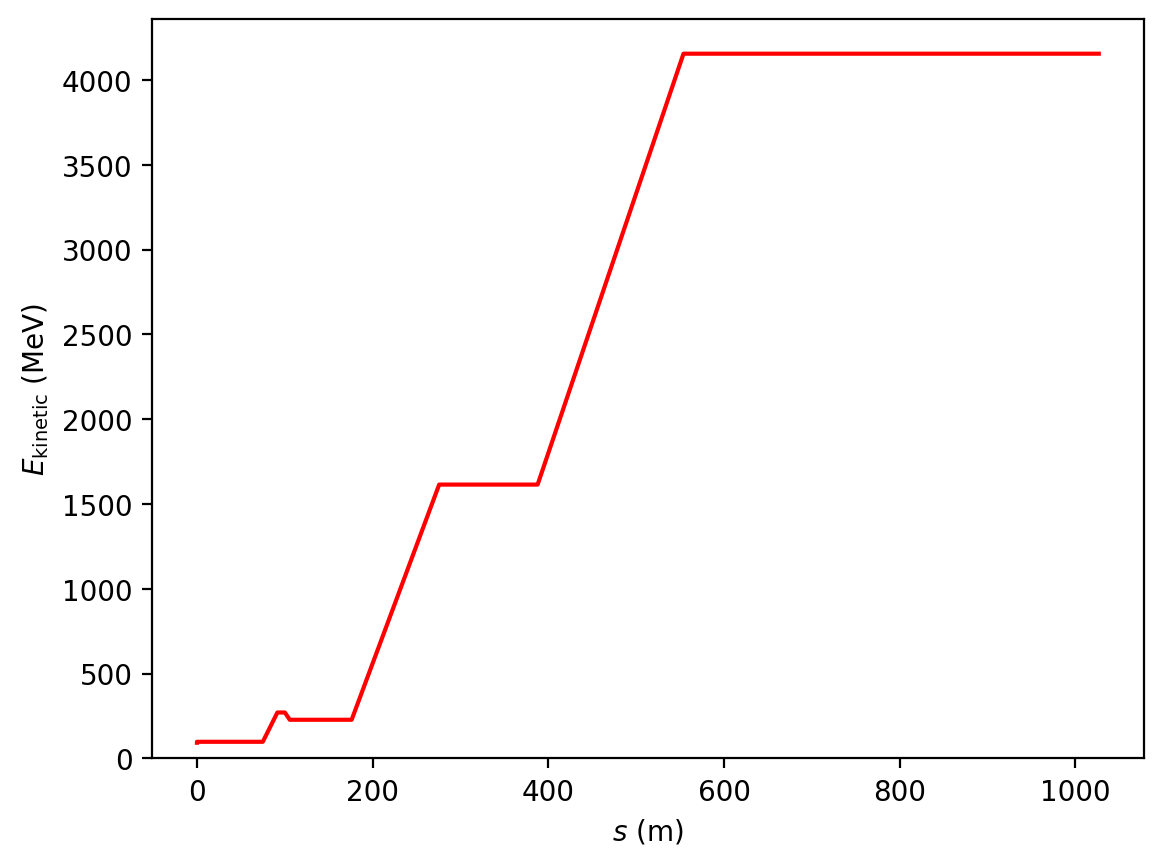

In [11]:
fig, ax = plt.subplots()
ax.plot(O.stats.distance, O.stats.kinetic_energy/1e6, color='red')
ax.set_xlabel(r'$s$ (m)')
ax.set_ylabel(r'$E_\text{kinetic}$ (MeV)')
ax.set_ylim(0, None)

(0.0, 1.04322697199)

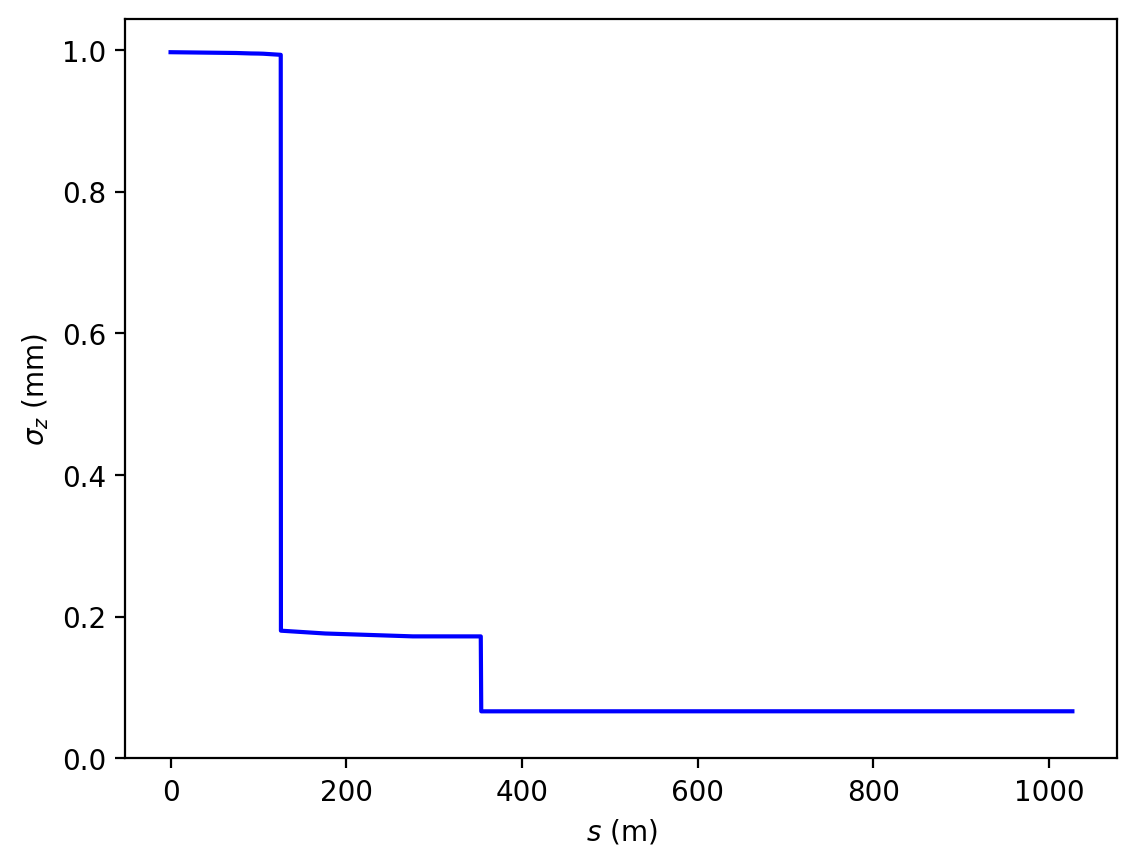

In [12]:
fig, ax = plt.subplots()
ax.plot(O.stats.distance, O.stats.rms_z*1e3, color='blue')
ax.set_xlabel(r'$s$ (m)')
ax.set_ylabel(r'$\sigma_z$ (mm)')
ax.set_ylim(0, None)

# Particles 

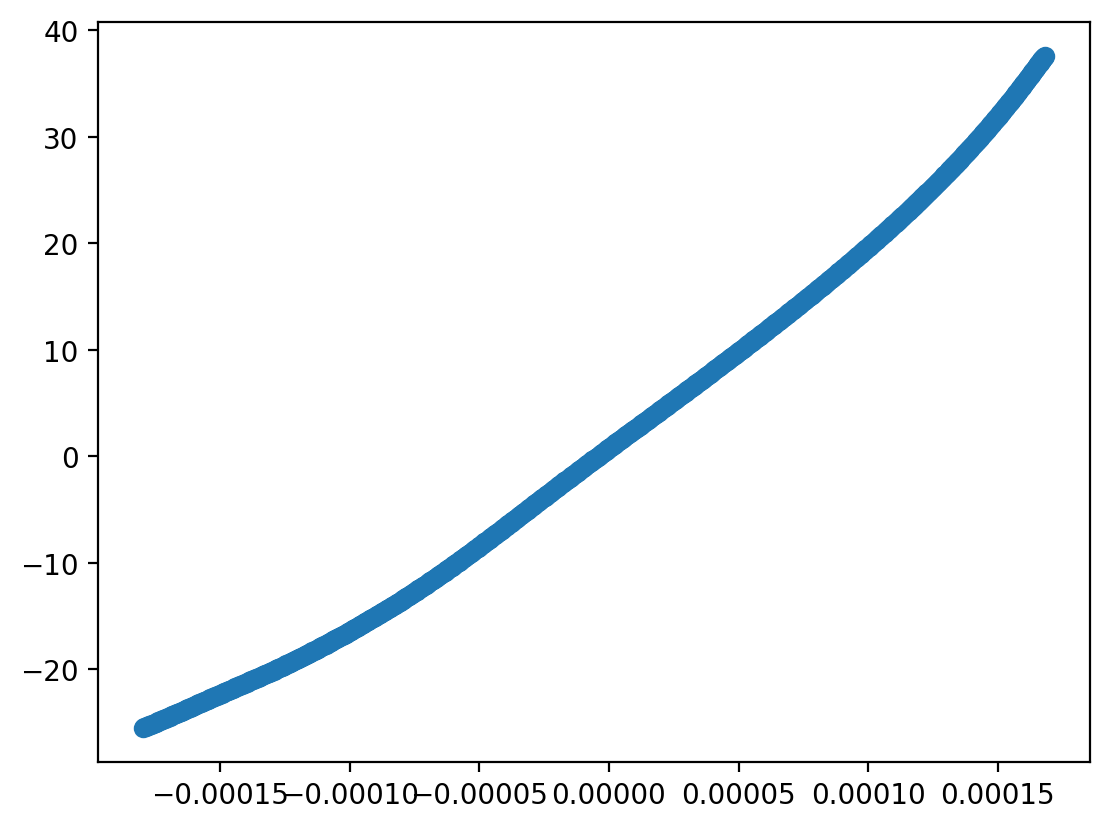

In [13]:
p = O.particle_distributions[201]
plt.scatter(p.z, p.delta_gamma)

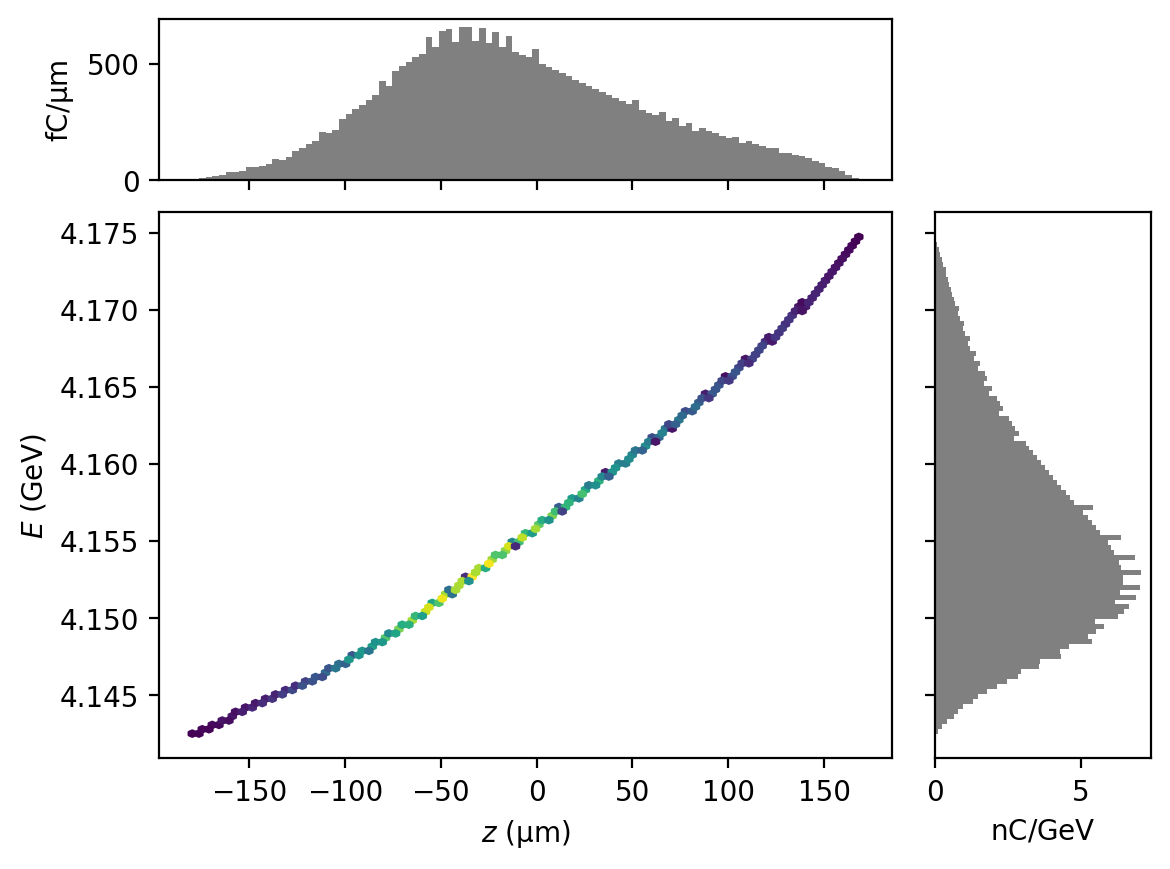

In [14]:
def particlegroup_data_from_eblt(p):
    z = p.z
    gamma = p.gamma
    weight = p.weight
    n = len(z)
    pz = np.sqrt(gamma**2 - 1)*mec2
    return dict(
        t=np.zeros(n),
        x=np.zeros(n),
        px=np.zeros(n),
        y=np.zeros(n),
        py=np.zeros(n),
        z=p.z,
        pz=pz,
        weight=weight,
        status=np.ones(n),
        species='electron')



P = ParticleGroup(data=particlegroup_data_from_eblt(p))

P.plot('z', 'energy', bins=100)